Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


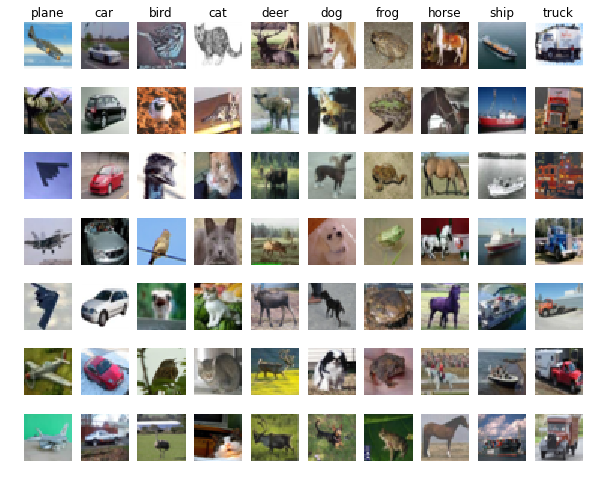

In [1]:
import pyximport
pyximport.install()
import numpy as np
from fastlayers import *
from data_utils import *
from dense import *
from flatten import *
from maxpooling import *
from model import *
from relu import *
from softmax import *
from optimizer import *
from dropout import *

import matplotlib as plt


data = get_CIFAR10_data()


np.random.seed(5)


    

In [2]:
model = Model(data['X_train'],data['y_train'],data['X_test'],data['y_test'],num_epochs=50,batch_size = 250)


model.add_augmentation(  rotation_range=5,
                         height_shift_range=0.16,
                         width_shift_range=0.16,
                         img_row_axis=1,
                         img_col_axis=2,
                         img_channel_axis=0,
                         horizontal_flip=True,
                         vertical_flip=False)


model.add_layer(ConvolutionalLayer(num_filters=32))
model.add_layer(Relu())
model.add_layer(Dropout(0.8))
model.add_layer(ConvolutionalLayer(input_shape=[32,32,32],num_filters=32,filter_dims=[32,3,3]))
model.add_layer(Relu())
model.add_layer(MaxPooling())

model.add_layer(ConvolutionalLayer(input_shape=[32,16,16],num_filters=64,filter_dims=[32,3,3]))
model.add_layer(Relu())
model.add_layer(Dropout(0.75))
model.add_layer(ConvolutionalLayer(input_shape=[64,16,16],num_filters=64,filter_dims=[64,3,3]))
model.add_layer(Relu())
model.add_layer(MaxPooling())

model.add_layer(Flatten())

model.add_layer(Dropout(0.85))
model.add_layer(Dense(input_shape=4096,neurons=1024))
model.add_layer(Relu())
model.add_layer(Dropout(0.80))
model.add_layer(Dense(input_shape=1024,neurons=512))
model.add_layer(Relu())
model.add_layer(Dropout(0.80))

#output layer

model.add_layer(Dense(input_shape=512,neurons=10))
model.add_layer(SoftmaxLayer())




(32, 32, 32)
(32, 32, 32)
(64, 16, 16)
(64, 16, 16)


In [3]:
print model.layers
model.train()


[<fastlayers.ConvolutionalLayer instance at 0x7f43af50a3f8>
 <relu.Relu instance at 0x7f43af538440>
 <dropout.Dropout instance at 0x7f43af50a518>
 <fastlayers.ConvolutionalLayer instance at 0x7f43af50aa28>
 <relu.Relu instance at 0x7f43af50a248>
 <maxpooling.MaxPooling instance at 0x7f43af6f8908>
 <fastlayers.ConvolutionalLayer instance at 0x7f43b09042d8>
 <relu.Relu instance at 0x7f43b02252d8>
 <dropout.Dropout instance at 0x7f43b0551e60>
 <fastlayers.ConvolutionalLayer instance at 0x7f43b05b0290>
 <relu.Relu instance at 0x7f43b05b01b8>
 <maxpooling.MaxPooling instance at 0x7f43b02b5c68>
 <flatten.Flatten instance at 0x7f43b08f4e60>
 <dropout.Dropout instance at 0x7f43b0c55908>
 <dense.Dense instance at 0x7f43b04df5f0>
 <relu.Relu instance at 0x7f43af7b9bd8>
 <dropout.Dropout instance at 0x7f43af8c94d0>
 <dense.Dense instance at 0x7f43af7b99e0>
 <relu.Relu instance at 0x7f43af6ac638>
 <dropout.Dropout instance at 0x7f43b0295488>
 <dense.Dense instance at 0x7f43af6acef0>
 <softmax.Soft

In [15]:

test_acc = model.check_accuracy(data['X_test'],data['y_test'])
print "Test accuracy is:", test_acc
    

Test accuracy is: 0.8228


In [25]:
X_test = data['X_test']
y_test = data['y_test']
y_test_pred = classpredict(model,X_test)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)

comp = (y_test_pred == y_test)
print "Accuracy per Class: "
class_accuracy = []
for i in range(10):
    index = np.flatnonzero(y_test == i)
    current_correct = np.sum(comp[index])
    current_accuracy = current_correct/1000.0
    class_accuracy.append(current_accuracy)
    print classes[i] + " Accuracy: "  + str(current_accuracy)


Accuracy per Class: 
plane Accuracy: 0.836
car Accuracy: 0.909
bird Accuracy: 0.718
cat Accuracy: 0.601
deer Accuracy: 0.723
dog Accuracy: 0.641
frog Accuracy: 0.929
horse Accuracy: 0.823
ship Accuracy: 0.867
truck Accuracy: 0.918


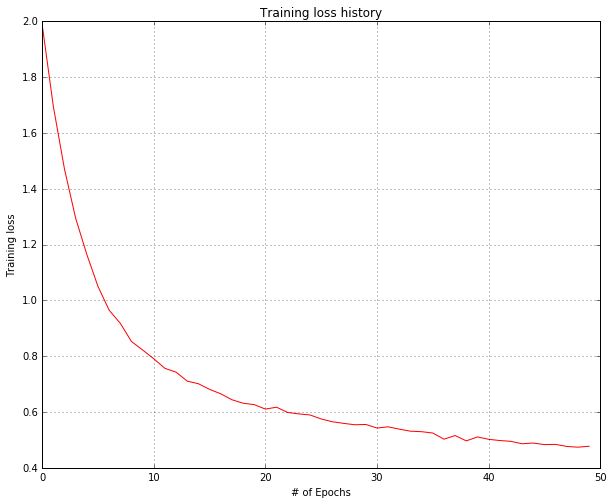

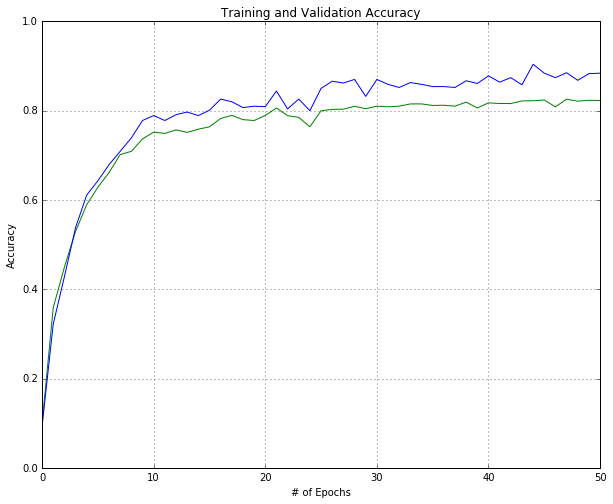

In [24]:
import matplotlib.pyplot as plt
plt.plot(model.actual_training_loss, 'r-')
plt.title('Training loss history')
plt.xlabel('# of Epochs')
plt.ylabel('Training loss')
plt.grid(True)
plt.show()


plt.plot(model.val_acc_history, 'g-')
plt.plot(model.train_acc_history, 'b-')
plt.title('Training and Validation Accuracy')
plt.xlabel('# of Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()